In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import matplotlib.pyplot as plt 
import pandas as pd 
from utils_markov import *

In [16]:
strat_df = get_data(start_date="2019-01-01",end_date="2024-05-21")
# strat_df = calculate_strat(strat_df,n_loss_days=3)
# strat_df = calculate_strat_returns(strat_df,initial_investment=10000)

[*********************100%%**********************]  1 of 1 completed


In [48]:
hold_df = generate_hold_df(start_date="2019-01-01",end_date="2024-05-21",initial_investment=10000)
hold_df.tail()

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Date': hold_df['Date'],
    # 'Simple Returns': hold_df['returns']
})
plot_df.head(2)

[*********************100%%**********************]  1 of 1 completed


,Date
0,2019-01-01
1,2019-01-02


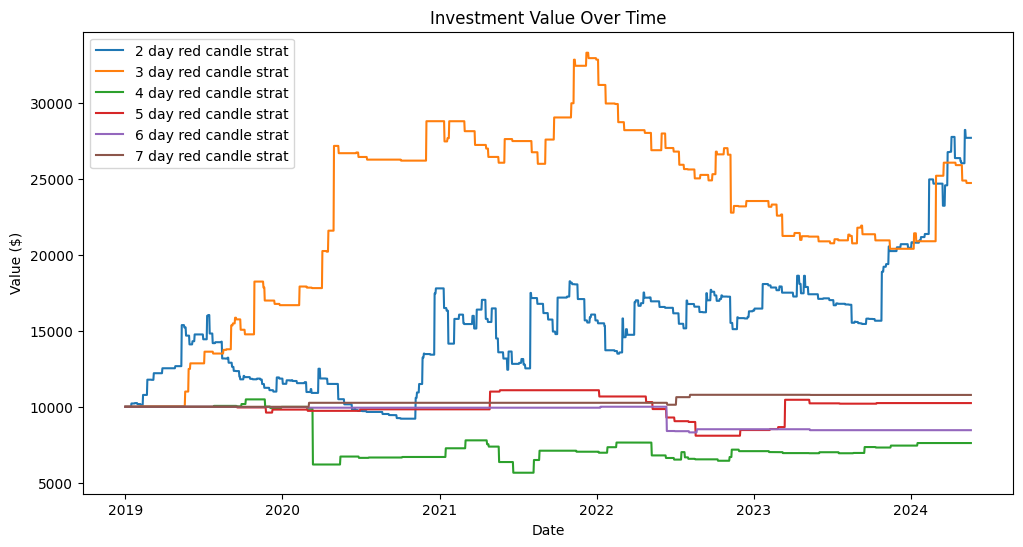

In [49]:
# List of n_loss_days values to plot
n_loss_days_list = [2, 3, 4, 5,6,7]

# Calculate strategy returns for each n_loss_days and add to plot_df
for n_loss_days in n_loss_days_list:
    strat_df_n = calculate_strat(strat_df, n_loss_days=n_loss_days)
    strat_df_n = calculate_strat_returns(strat_df_n, initial_investment=10000)
    plot_df[f'Strategy {n_loss_days} day'] = strat_df_n['investment_value']

# Set the Date column as the index for plotting
plot_df.set_index('Date', inplace=True)

# Plot the results
plt.figure(figsize=(12, 6))
for n_loss_days in n_loss_days_list:
    plt.plot(plot_df.index, plot_df[f'Strategy {n_loss_days} day'], label=f'{n_loss_days} day red candle strat')

# plt.plot(plot_df.index, plot_df['Simple Returns'], label='Hold Strat')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.title('Investment Value Over Time')
plt.legend()

# Display the plot
plt.show()